In [1]:
import numpy as np
from matplotlib  import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib as mpl

from model import random_walk_model

In [2]:
parameters = {"sigma_i" : 1,
              "sigma_j" : 2}

In [3]:
rw = random_walk_model(parameters)

In [4]:
TIME=2000
for t in range(TIME):
  rw.evolve_step()

(0.0, 200.0)

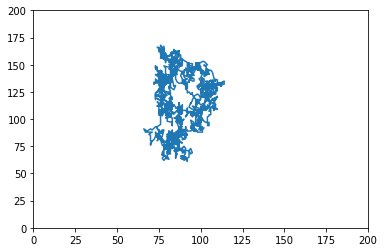

In [6]:
plt.plot(rw.trajectory[:TIME,0], rw.trajectory[:TIME,1])
plt.xlim(0,200)
plt.ylim(0,200)

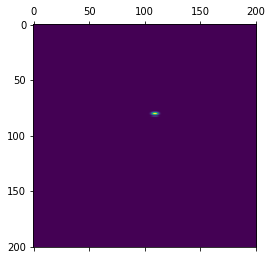

In [9]:
plt.matshow(rw.stepping_prob)

In [34]:

rw_eval = random_walk_model(parameters)

In [35]:
TIME=2000
lik = 0
for t in range(TIME):
  lik += rw_eval.evolve_step(sim=False, dat=rw.trajectory[t,:])
  

In [44]:
class gridsearch_dat():
  def __init__(self, ps, actual, grid):
    self.name = ps
    self.actual = actual
    self.grid = grid
    self.res = None

In [72]:
np.linspace(0.4,5.4,11)

array([0.4, 0.9, 1.4, 1.9, 2.4, 2.9, 3.4, 3.9, 4.4, 4.9, 5.4])

In [73]:
sigma_i = gridsearch_dat("sigma_i", [0.9,1.4,1.9], np.linspace(0.4,5.4,11))
sigma_j = gridsearch_dat("sigma_j", [0.9,1.4,1.9], np.linspace(0.4,5.4,11))
gs_list = [sigma_i, sigma_j]

In [74]:
pdict = parameters.copy()

In [75]:
import parameter_recovery as rec

In [76]:
NTRAJ = 5
TIME = 1000
for p in gs_list:
  print(p.name)
  pdict = parameters.copy()
  res = rec.param_recovers(p.name, p.actual, p.grid, pdict, NTRAJ, TIME)
  p.res = res

sigma_i
sigma_j


3it [00:47, 15.77s/it]
3it [00:49, 16.51s/it]


In [77]:
def plot_gs(P):
  fig, ax = plt.subplots(1,len(P.actual), figsize= (35,10))
  for i in range(len(P.actual)):
    for tr in range(3):
      ax[i].axvline(P.actual[i], c="red", lw=5)
      ax[i].plot(P.grid, P.res[i, :], ".-", c="black")
      fpname = P.name
      ax[i].set_title(f"{fpname}={P.actual[i]}", fontsize=25)
      ax[i].set_xlabel(f"Parameter Value", fontsize=20, color="grey")
      ax[i].set_ylabel(f"Likelihood", fontsize=20, color="grey")
      ax[i].tick_params(axis='both', labelsize=20,labelcolor="grey", color="grey")
      
  return fig, ax

In [78]:

mpl.rcParams["axes.prop_cycle"]=mpl.cycler(color=["slateblue","rebeccapurple","orchid"])
mpl.rc('axes',edgecolor='grey')

sigma_i
sigma_j


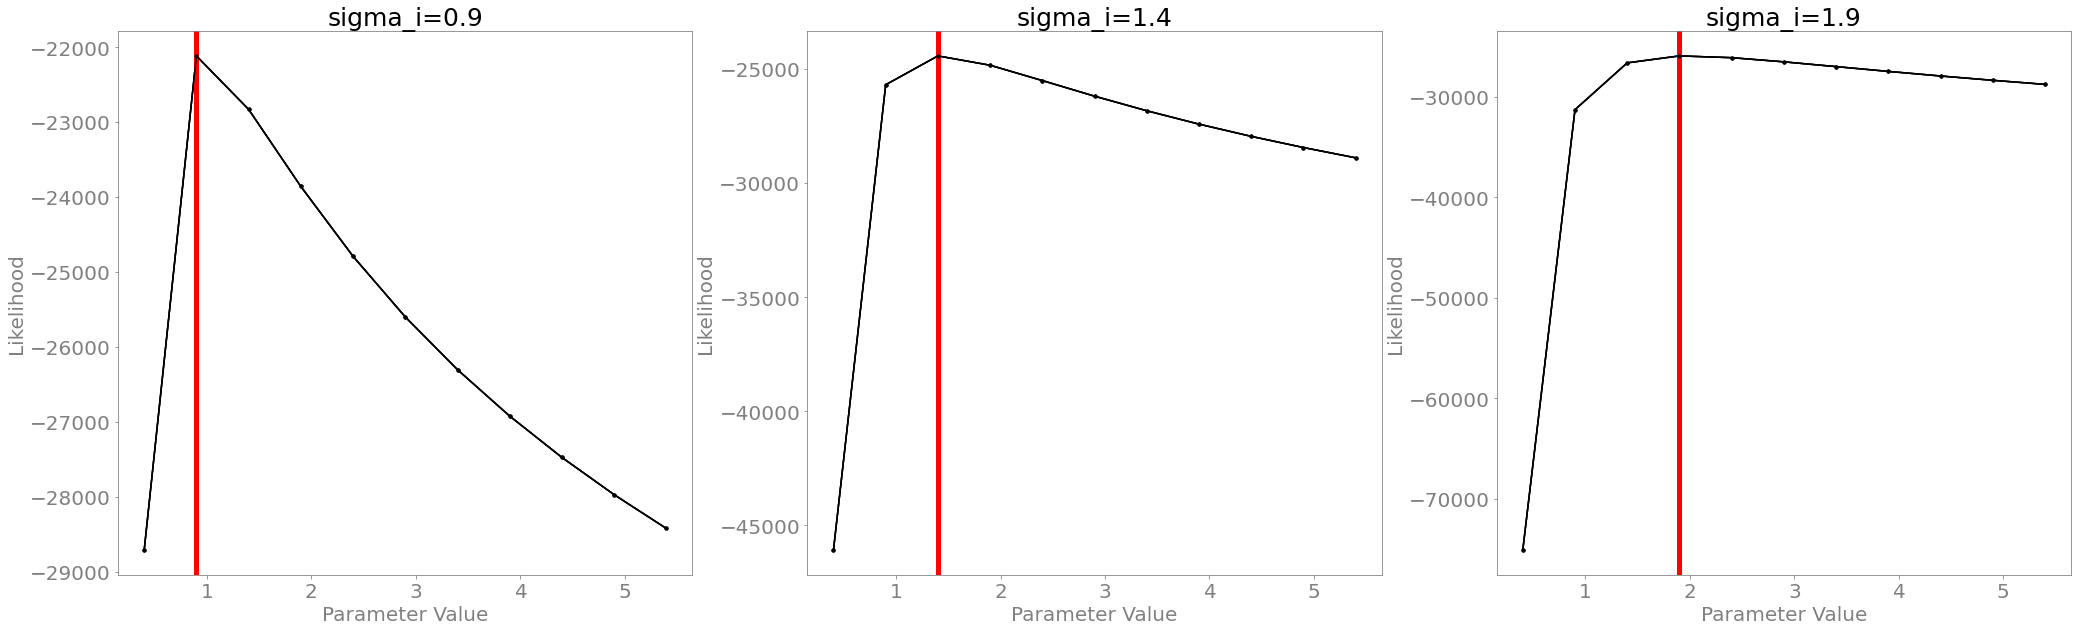

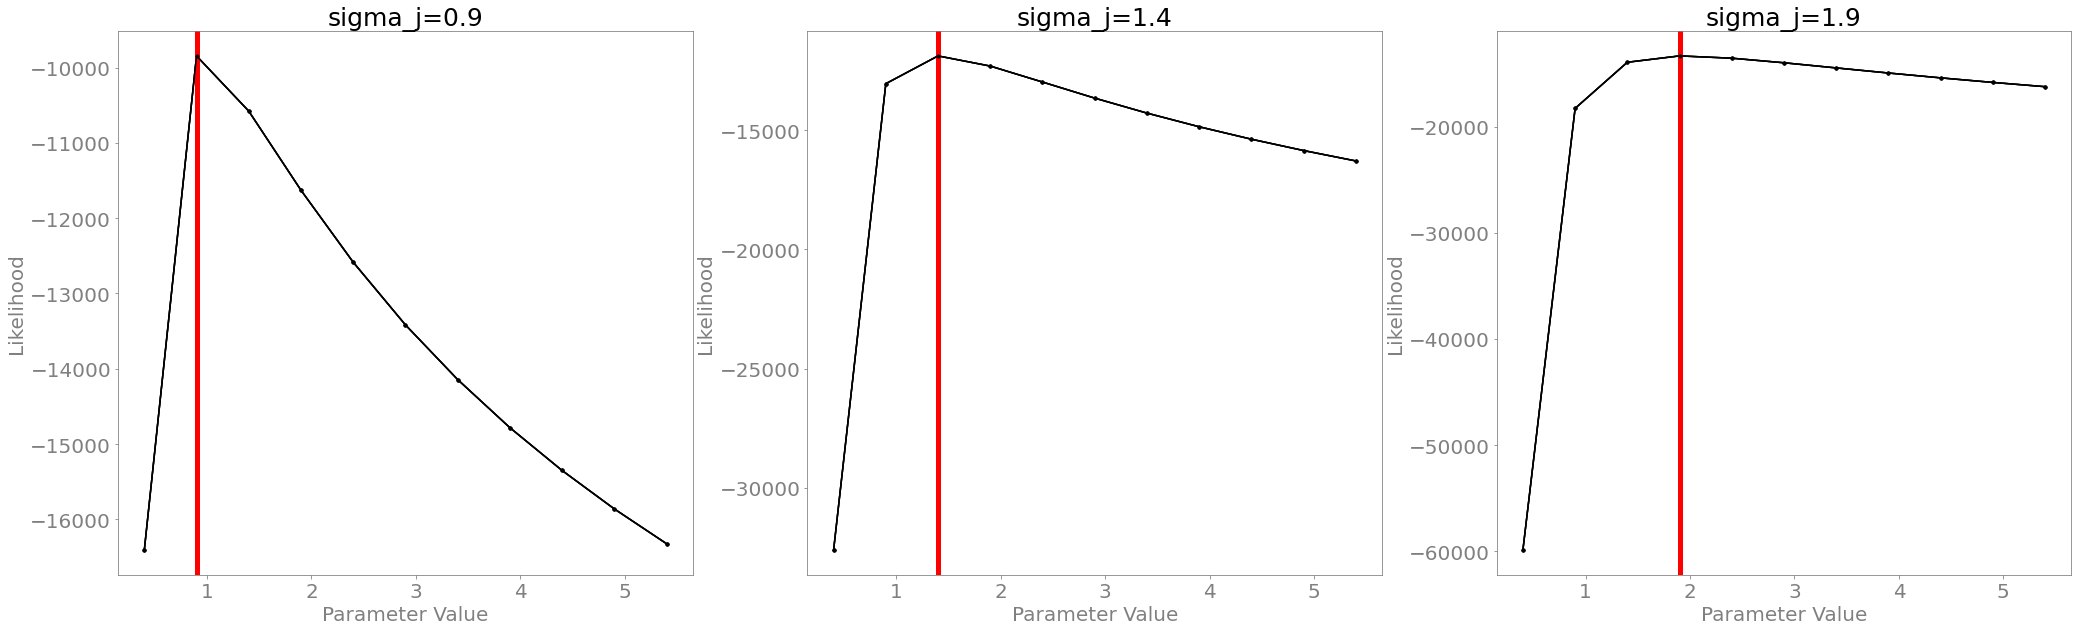

In [79]:
#gs_list = [slope,nu,VMAX,gamma,eta,phi,TSIZE]
with PdfPages('param_rec.pdf') as pdf:
    for P in gs_list:
        print(P.name)
        fig, ax = plot_gs(P)
        #fig.savefig(f"{P.name}.png")
        pdf.savefig(fig)

In [ ]:
lik

In [ ]:
parameters2 = {"sigma_i" : 5,
              "sigma_j" : 1}
rw_eval2 = random_walk_model(parameters2)

In [ ]:
TIME=2000
lik = 0
for t in range(TIME):
  lik += rw_eval.evolve_step(sim=False, dat=rw.trajectory[t,:])
lik

In [ ]:
import datasets as ds

In [ ]:
dat  = ds.dataset(random_walk_model, parameters)

In [ ]:
dat.simulate_data()

In [ ]:
dat.dataset.shape

In [ ]:
dat.evaluate_data()


In [ ]:
import parameter_recovery as rec

In [ ]:

for p in gs_list:
  print(p.name)
  pdict = parameters.copy()
  res = rec.param_recovers(p.name, p.actual, p.grid, pdict, NTRAJ, TIME)
  p.res = res